# TP3 : filtrage, restauration, détection de contours

## Partie I : Restauration d'image

### 1) L'objectif ici c'est d'appliquer les filtres gaussien et médian sur des images bruitées. Images à utiliser : Dead_tree_salt_and_pepper.png, bruitée avec un bruit poivre et sel, uro_irm et echo, images naturellement bruitée.

In [31]:
from scipy.ndimage import gaussian_filter, median_filter
import numpy as np 
import cv2
from matplotlib import  pyplot as plt
import os

In [19]:
# importing images 

images_name = os.listdir(os.path.join(os.getcwd(), "images"))

images = {image_name[:image_name.index(".")] : plt.imread(os.path.join(os.getcwd(), "images", image_name)) for image_name in images_name}

images.keys()

dict_keys(['lena1', 'scanner_tete', 'cell', 'codebarre', 'uro_irm', 'musc', 'Dead_tree_salt_and_pepper', 'texte', 'ancien2', 'ancien', 'echo', 'empr', 'photocoul', 'ancienne_medaillon', 'Coucher', 'noised', 'chro'])

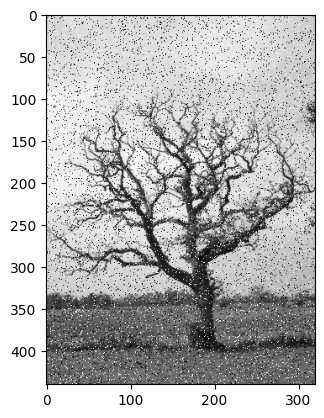

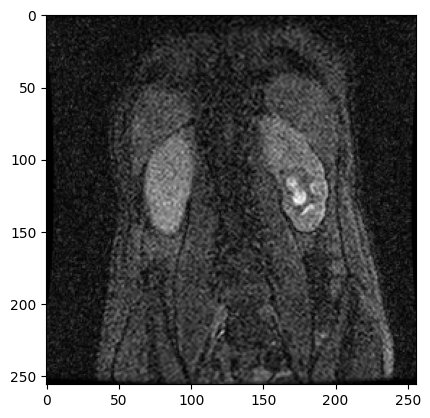

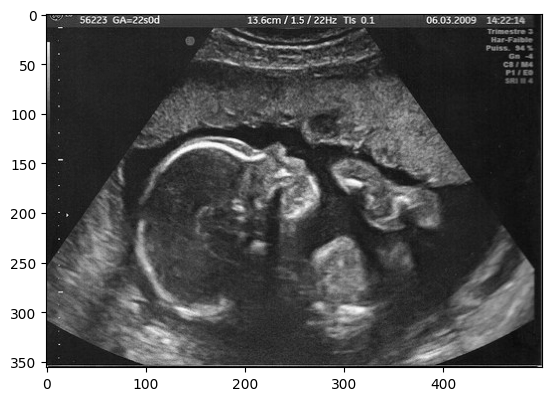

In [4]:
dts = images["Dead_tree_salt_and_pepper"]
plt.imshow(dts, cmap="gray")
plt.show()

uro = images["uro_irm"]
plt.imshow(uro, cmap="gray")
plt.show()

echo = images["echo"]
plt.imshow(echo, cmap="gray")
plt.show()

#### aplication du filtre gaussion avec different filtre

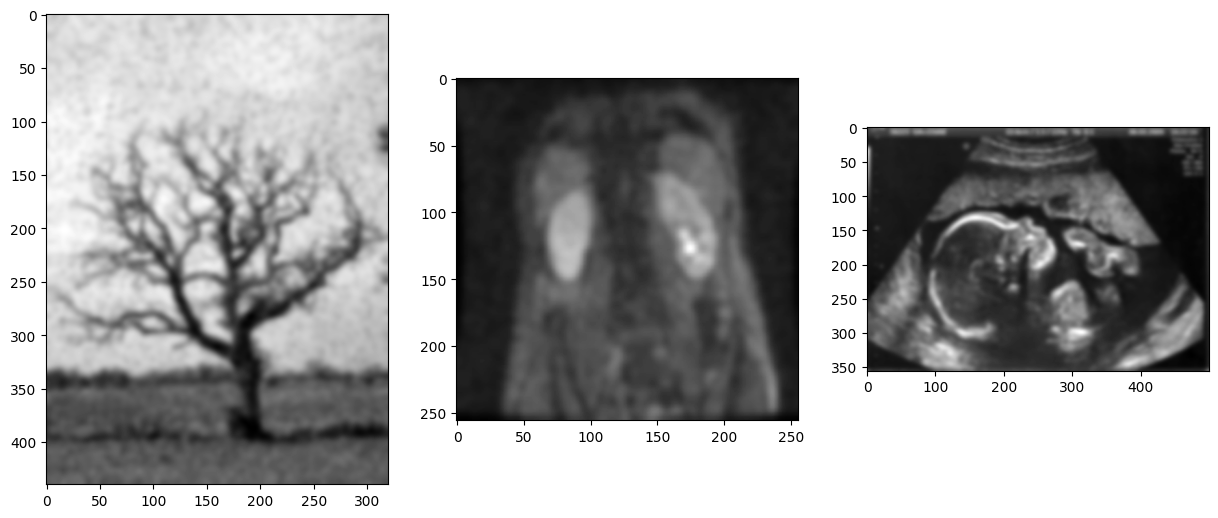

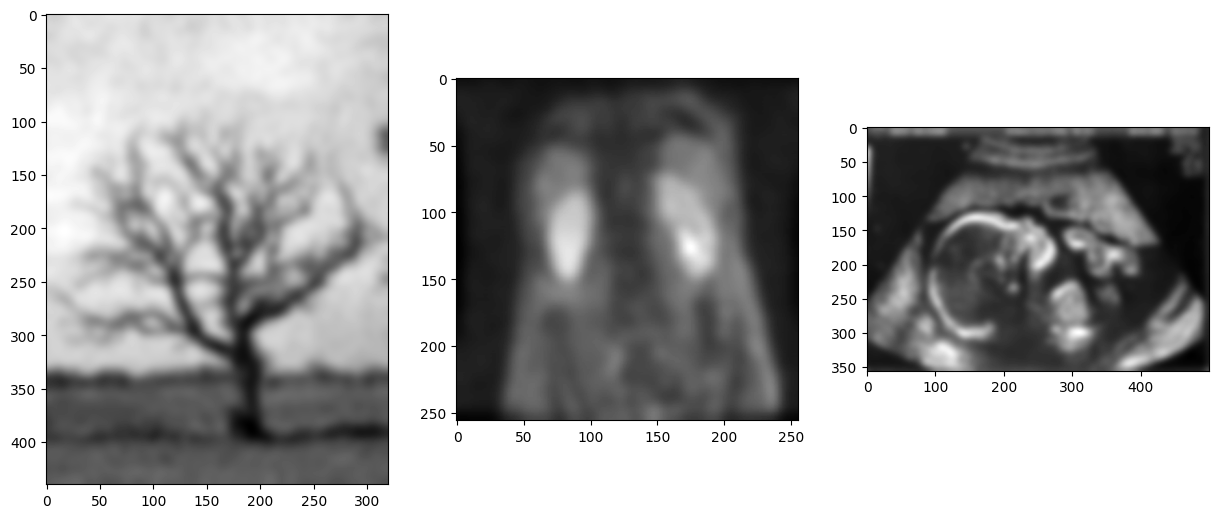

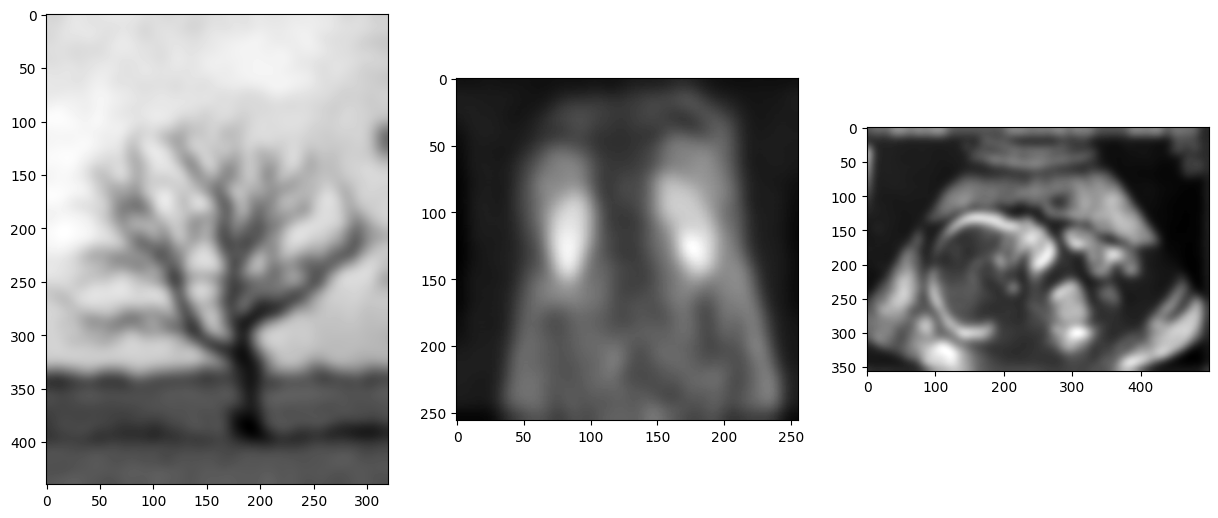

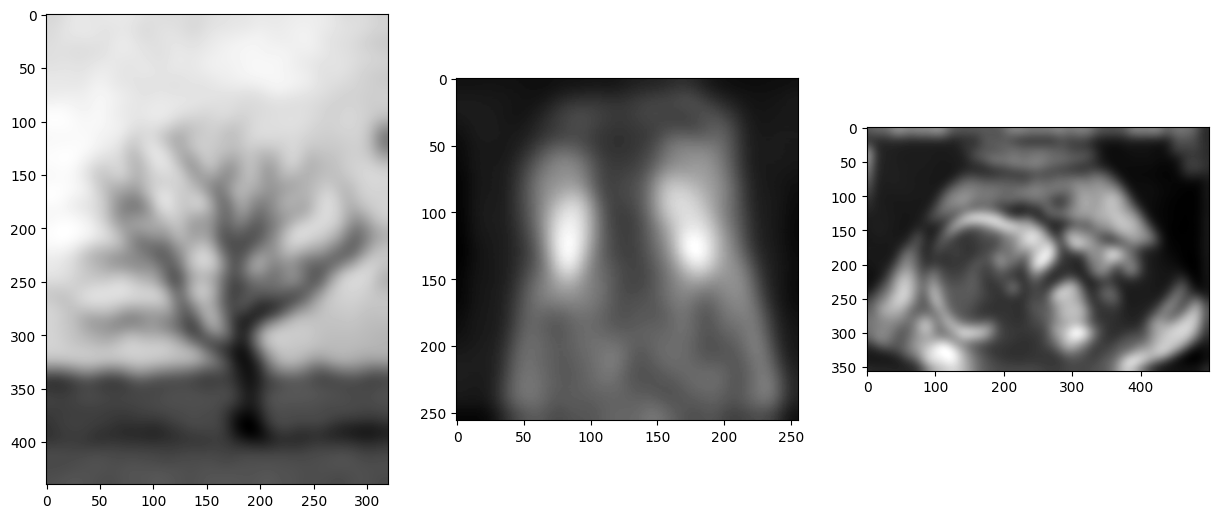

In [5]:
std_array = [3, 5, 7, 9]

for std in std_array:
    smoothed_dts = gaussian_filter(dts, sigma=std)
    smoothed_uro = gaussian_filter(uro, sigma=std)
    smoothed_echo = gaussian_filter(echo, sigma=std)

    plt.figure(figsize=(15, 7))
    plt.subplot(131)
    plt.imshow(smoothed_dts, cmap='gray')
    plt.subplot(132)
    plt.imshow(smoothed_uro, cmap='gray')
    plt.subplot(133)
    plt.imshow(smoothed_echo, cmap='gray')
    plt.show()

Apres avoir application du filtre gaussien avec un sigma croissant on observe que le bruit est toujours present et l'image est de plus

en plus flou.

#### aplication du filtre gaussion avec different filtre

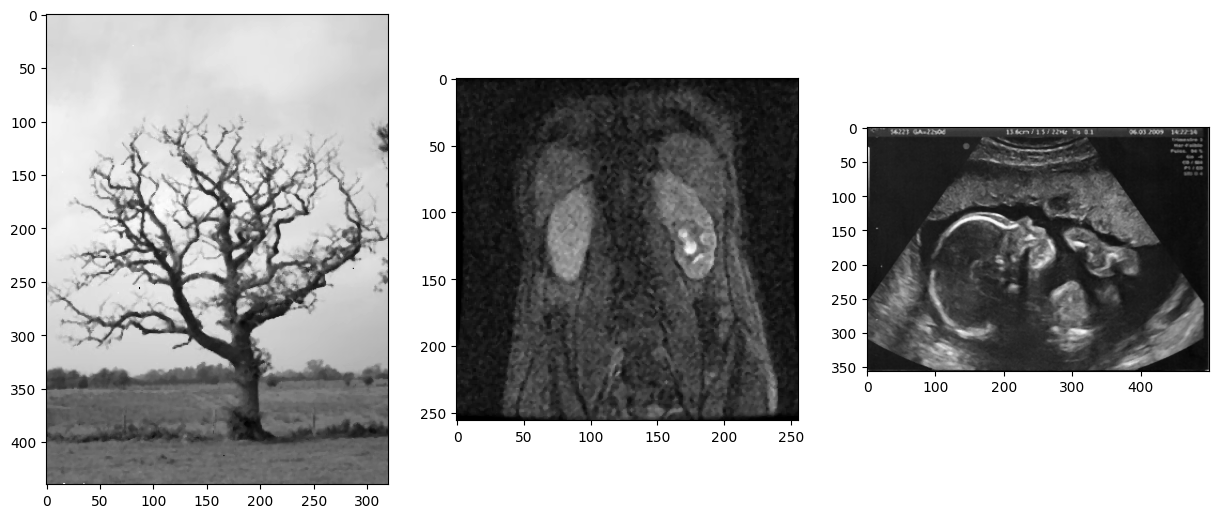

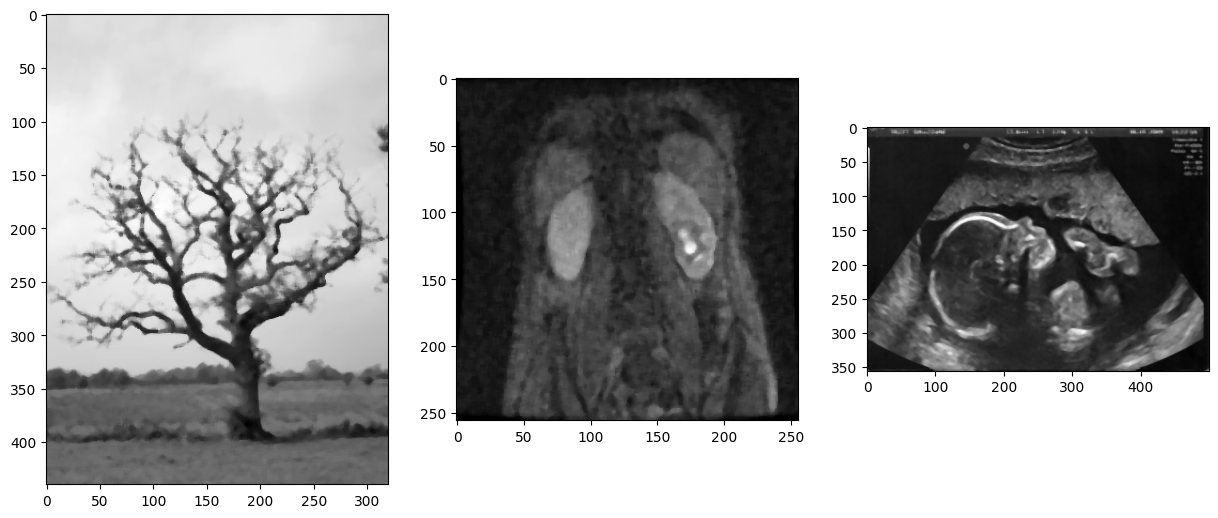

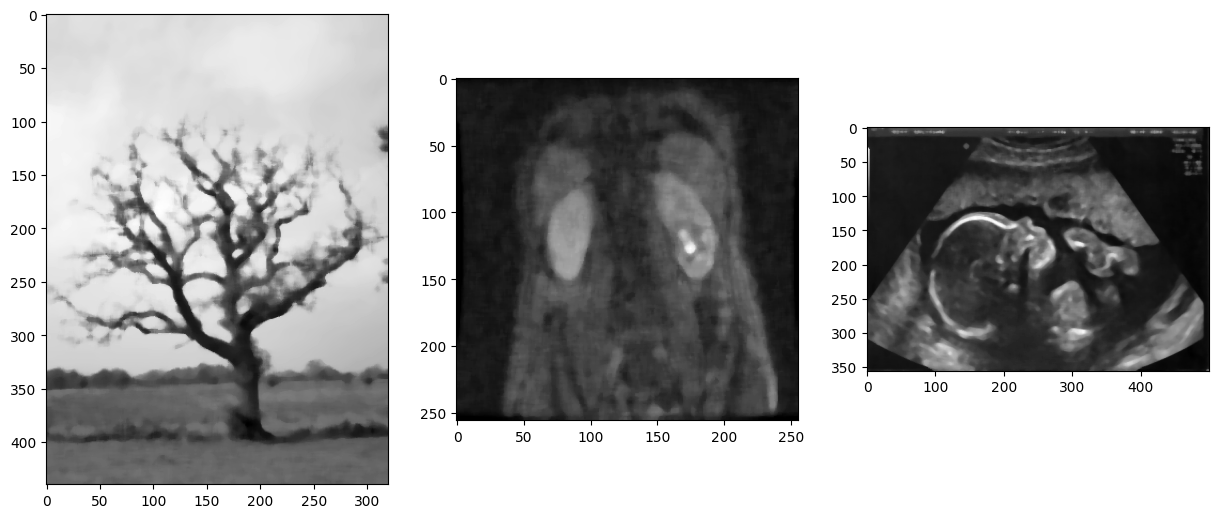

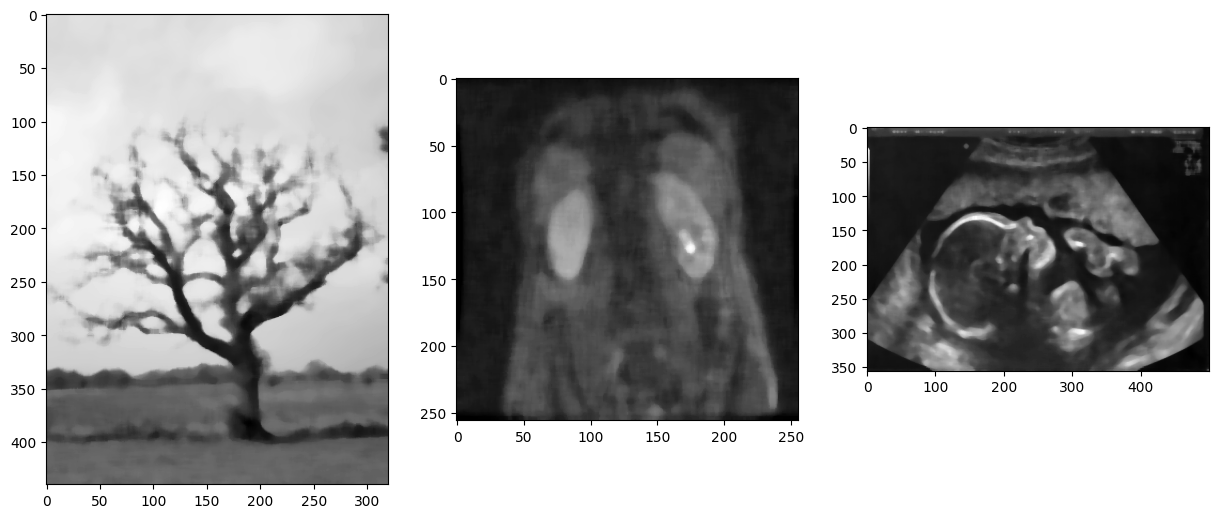

In [6]:
median_size = [(3, 3), (5, 5), (7, 7), (9, 9)]

for size in median_size:
    smoothed_dts = median_filter(dts, size=size)
    smoothed_uro = median_filter(uro, size=size)
    smoothed_echo = median_filter(echo, size=size)

    plt.figure(figsize=(15, 7))
    plt.subplot(131)
    plt.imshow(smoothed_dts, cmap='gray')
    plt.subplot(132)
    plt.imshow(smoothed_uro, cmap='gray')
    plt.subplot(133)
    plt.imshow(smoothed_echo, cmap='gray')
    plt.show()

On remarque que le filtre median est beucoup plus adapter au bruit poivre et sel .

Le bruit est completement enlever.Par contre plus la taille du filtre est grande, plus 

l'image est legerement flouté et des details de l'image  disparaissent .

### 2) Appliquer un filtre gaussien avec une grande variance sur une image peu ou pas bruitée, que vous choisirez.

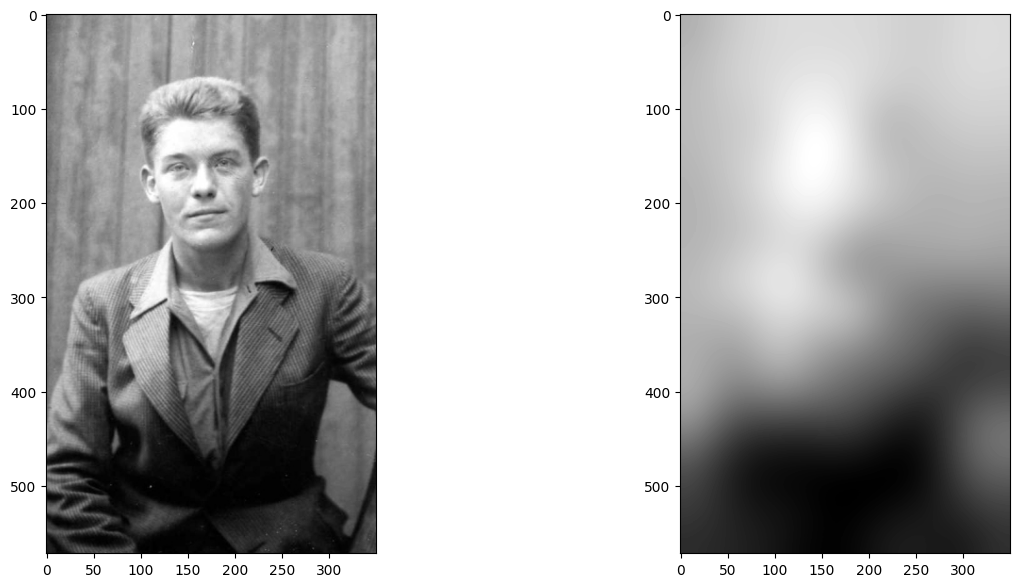

In [17]:
ancien = images["ancien"]


high_gaussian_ancien = gaussian_filter(ancien, sigma=30)


plt.figure(figsize=(15, 7))
plt.subplot(121)
plt.imshow(ancien, cmap='gray')
plt.subplot(122)
plt.imshow(high_gaussian_ancien, cmap='gray')

plt.show()

Si on prend une grande valeur de sigma l'image sera completement flou

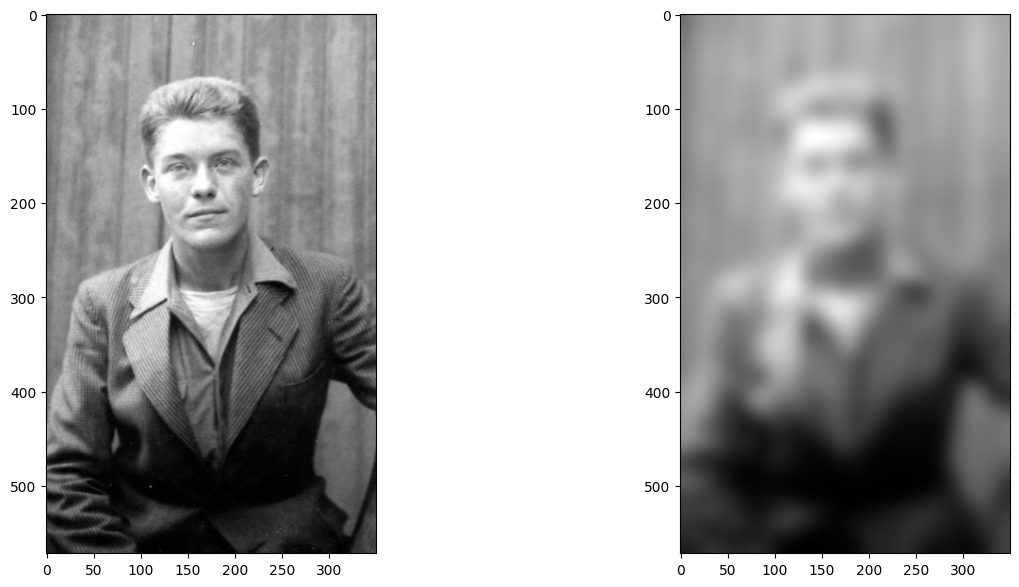

In [15]:
ancien = images["ancien"]


low_gaussian_ancien = gaussian_filter(ancien, sigma=5)


plt.figure(figsize=(15, 7))
plt.subplot(121)
plt.imshow(ancien, cmap='gray')
plt.subplot(122)
plt.imshow(low_gaussian_ancien, cmap='gray')

plt.show()

si on applique le gaussien avec un flaible sigma : L'image est toujour floue mais beaucoup moins que tout a l'heure

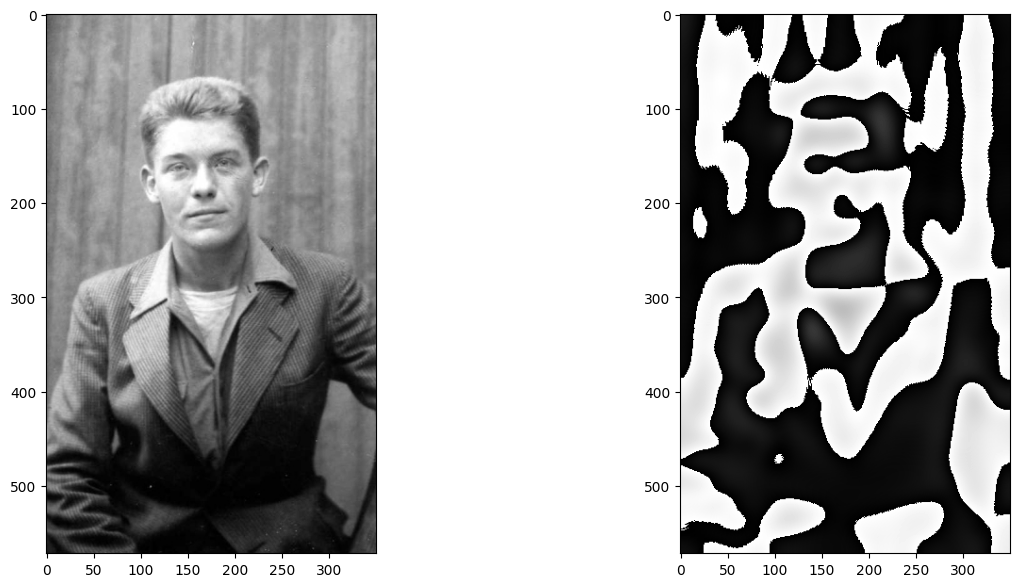

In [18]:
DoG = high_gaussian_ancien - low_gaussian_ancien

plt.figure(figsize=(15, 7))
plt.subplot(121)
plt.imshow(ancien, cmap='gray')
plt.subplot(122)
plt.imshow(DoG, cmap='gray')


on voit que le DoG rend visible les contours

## Partie II  : Détection de contours

In [28]:
not_noised = images["ancien"]
noised = images["Dead_tree_salt_and_pepper"]

#### Appliquer un filtrage passe-haut (Sobel) pour obtenir les contours en x notés Gx et les contours en y notés Gy de l’image.

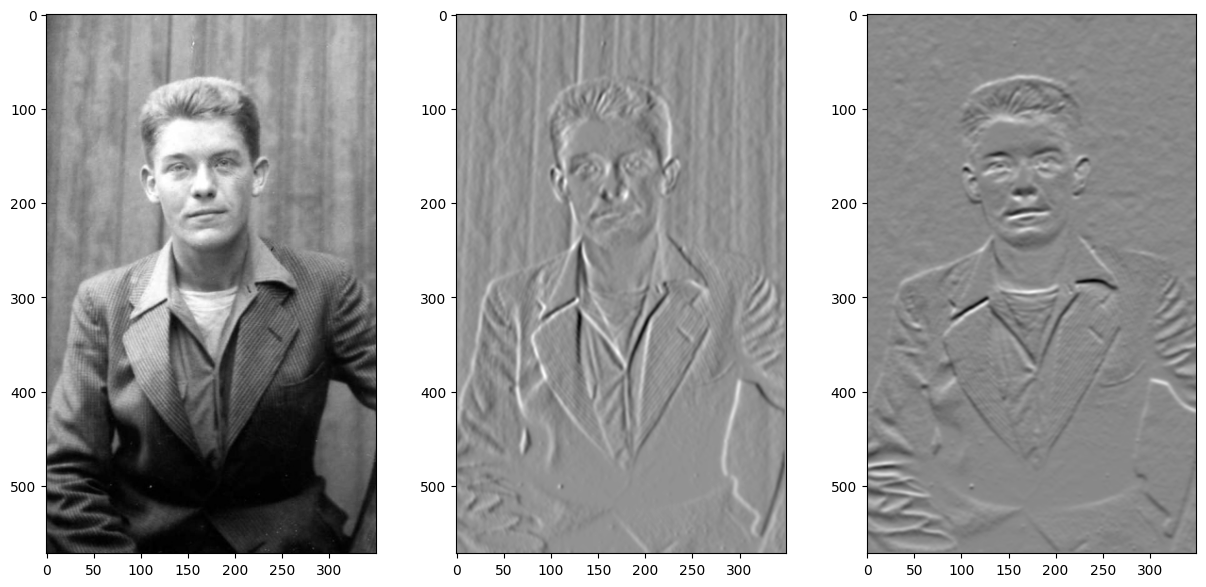

In [21]:
not_noised_Gx = cv2.Sobel(not_noised, cv2.CV_64F, 1, 0, ksize=9)
not_noised_Gy = cv2.Sobel(not_noised, cv2.CV_64F, 0, 1, ksize=9)

plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.imshow(not_noised, cmap='gray')
plt.subplot(132)
plt.imshow(not_noised_Gx, cmap='gray')
plt.subplot(133)
plt.imshow(not_noised_Gy, cmap='gray')



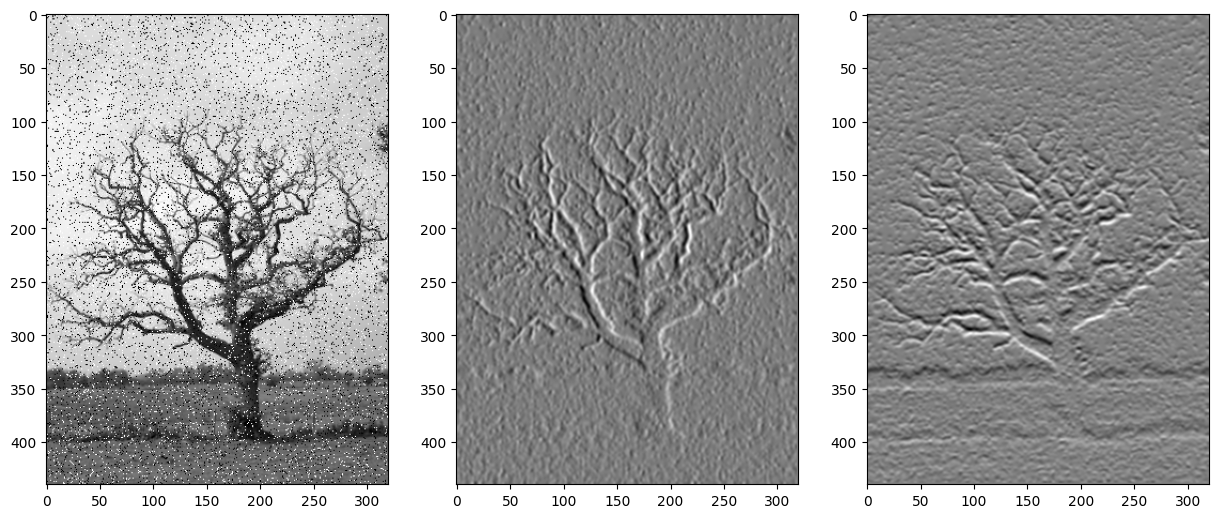

In [29]:
noised_Gx = cv2.Sobel(noised, cv2.CV_64F, 1, 0, ksize=9)
noised_Gy = cv2.Sobel(noised, cv2.CV_64F, 0, 1, ksize=9)

plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.imshow(noised, cmap='gray')
plt.subplot(132)
plt.imshow(noised_Gx, cmap='gray')
plt.subplot(133)
plt.imshow(noised_Gy, cmap='gray')



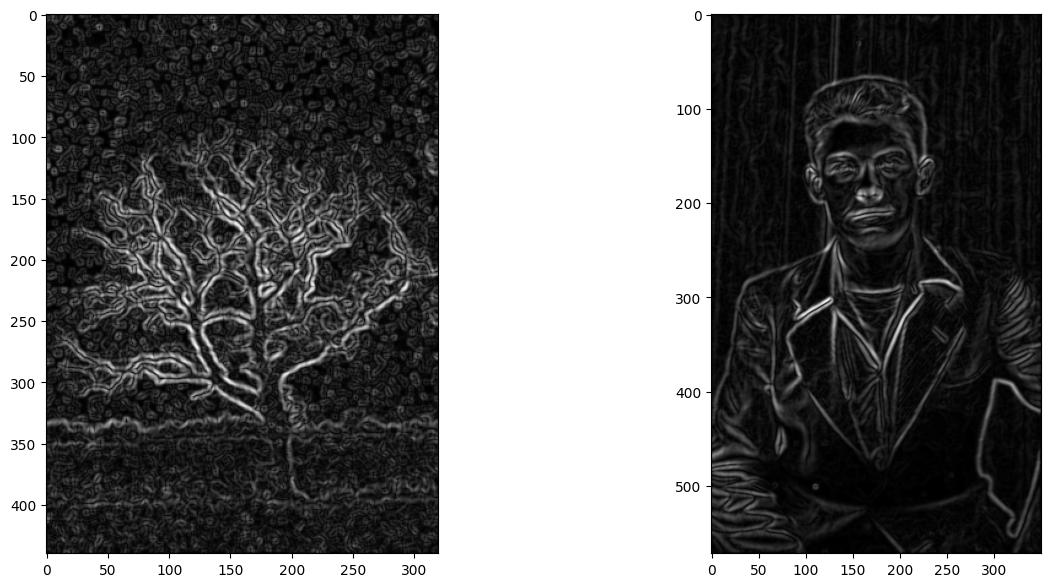

In [35]:
noised_edge = np.abs(noised_Gx) + np.abs(noised_Gy) 
not_noised_edge = np.abs(not_noised_Gx) + np.abs(not_noised_Gy) 


plt.figure(figsize=(15, 7))
plt.subplot(121)
plt.imshow(noised_edge, cmap='gray')noised_Gx = cv2.Sobel(noised, cv2.CV_64F, 1, 0, ksize=9)
noised_Gy = cv2.Sobel(noised, cv2.CV_64F, 0, 1, ksize=9)

plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.imshow(noised, cmap='gray')
plt.subplot(132)
plt.imshow(noised_Gx, cmap='gray')
plt.subplot(133)
plt.imshow(noised_Gy, cmap='gray')
plt.subplot(122)
plt.imshow(not_noised_edge, cmap='gray')

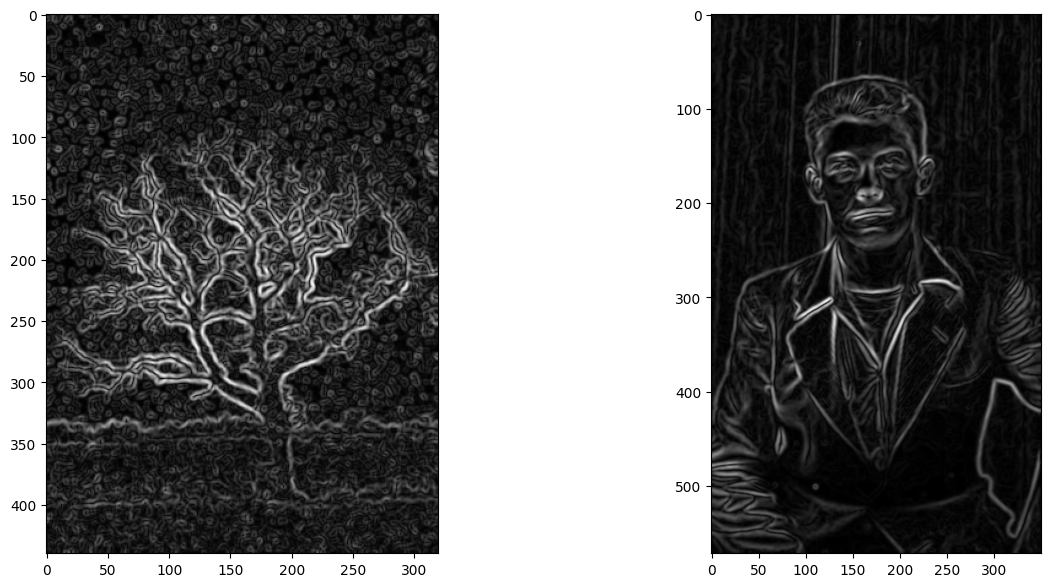

In [36]:
noised_edge =  np.sqrt(noised_Gx**2 + noised_Gy**2) 
not_noised_edge = np.sqrt(not_noised_Gx**2 + not_noised_Gy**2) 

plt.figure(figsize=(15, 7))
plt.subplot(121)
plt.imshow(noised_edge, cmap='gray')
plt.subplot(122)
plt.imshow(not_noised_edge, cmap='gray')

On remarque que  Tel que soit le methode fusion utilisée (somme de valeur absolue ou norme du gradiant) le filtre Sobel met en exergue les contours mais conserve le bruit

#### 2) Appliquer la méthode de Canny pour détecter les contours. Faire varier les hyperparamètres et regarder les résultats.

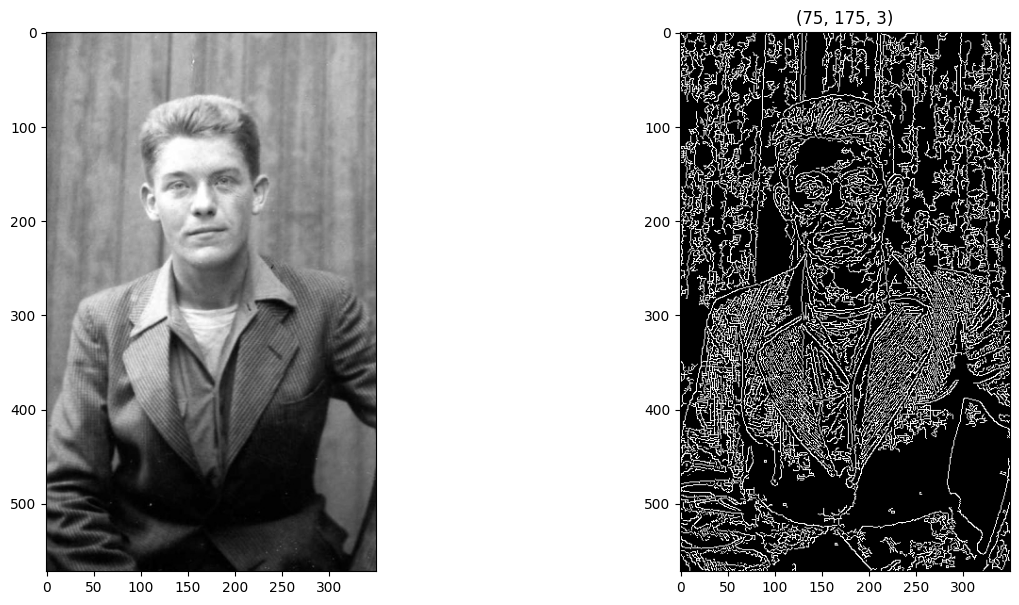

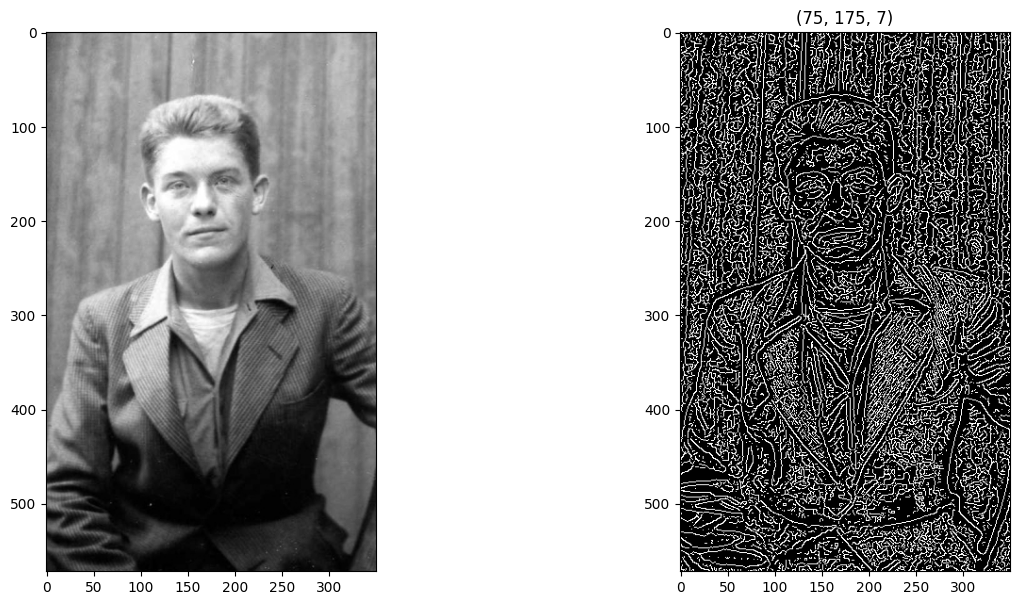

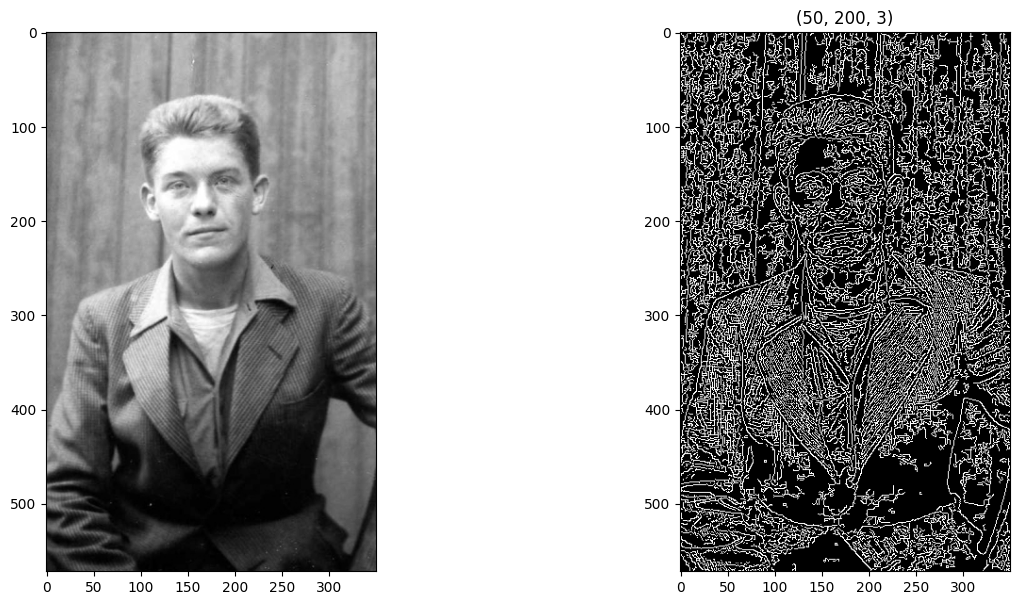

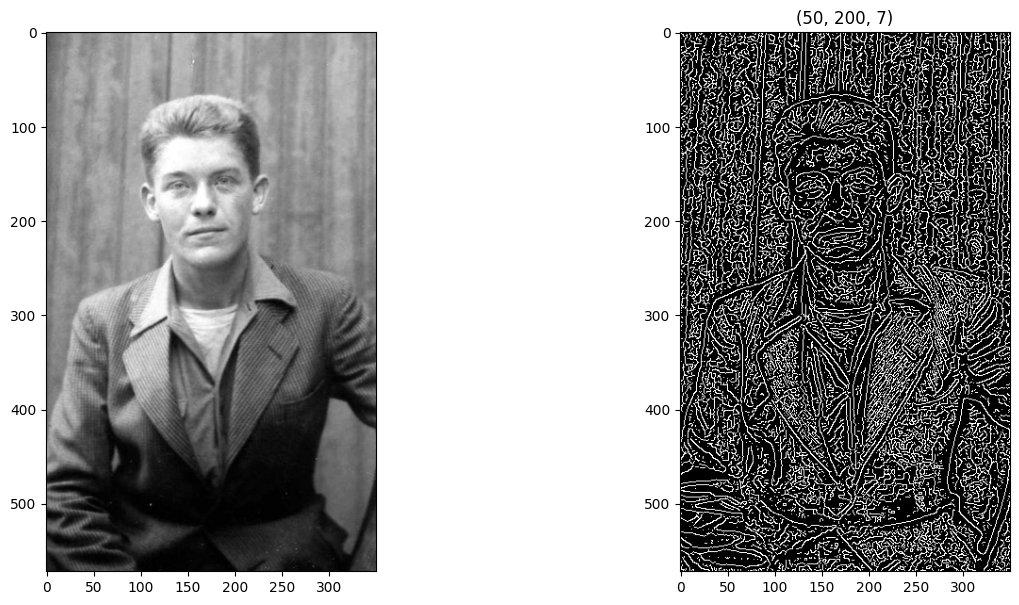

In [40]:
parameter = [
    (75, 175, 3),
    (75, 175, 7),
    (50, 200, 3),
    (50, 200, 7)
]

for param in parameter:
    egde_not_noised = cv2.Canny(not_noised, cv2.CV_64F, param[0], param[1], apertureSize=param[2])
    plt.figure(figsize=(15, 7))
    plt.subplot(121)
    plt.imshow(not_noised, cmap='gray')
    plt.subplot(122)
    plt.imshow(egde_not_noised, cmap='gray')
    plt.title(param)


On remarque une  densite de contours plus important quand si on augmente la taille du filtre.
L'effet de l'ecart entre le seuil supperieur et le seuil inferieur n'est pas trop senti.

#### 3) Afficher le laplacien d'une image. Combiner le laplacien avec l'image originale pour réhausser les contours, comme vu en cours.

In [ ]:
for size in [3, 5, 7, 9]:
    egde_not_noised = cv2.Laplacian(not_noised, 4, ksize=size)
    plt.figure(figsize=(15, 7))
    plt.subplot(121)
    plt.imshow(not_noised, cmap='gray')
    plt.subplot(122)
    plt.imshow(egde_not_noised, cmap='gray')
    plt.title(param)